In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
data1 = pd.read_csv("Hiring/resumes_development.csv")
data2 = pd.read_csv("Hiring/resumes_pilot.csv")

In [3]:
data = pd.concat([data1, data2])
data.head()

,Unnamed: 0,Interview,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,...,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.isna().sum()

Unnamed: 0             0
Interview              0
Adobe Illustrator      0
Adobe Photoshop        0
Agile Methodologies    0
                      ..
Writing                0
Veteran                0
Female                 0
URM                    0
Disability             0
Length: 224, dtype: int64

In [5]:
data = data.drop('Unnamed: 0', axis=True)

In [6]:
X = data.drop('Interview', axis=1)
y = data['Interview']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train.head()

,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,...,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
340,-0.146436,-0.16863,-0.359937,-0.162094,7.627701,-0.146436,-0.163749,-0.176496,-0.174948,-0.162094,...,-0.150044,-0.14825,-0.165391,-0.165391,-0.16863,-0.171815,1.265122,0.997443,1.048809,1.091751
1209,-0.146436,-0.16863,-0.359937,-0.162094,-0.131101,-0.146436,-0.163749,-0.176496,-0.174948,-0.162094,...,-0.150044,-0.14825,-0.165391,-0.165391,-0.16863,-0.171815,-0.790438,-1.002563,-0.953463,-0.915960
756,-0.146436,-0.16863,-0.359937,-0.162094,-0.131101,-0.146436,-0.163749,-0.176496,-0.174948,-0.162094,...,-0.150044,-0.14825,6.046296,-0.165391,-0.16863,-0.171815,-0.790438,0.997443,-0.953463,-0.915960
472,-0.146436,-0.16863,-0.359937,-0.162094,-0.131101,-0.146436,-0.163749,-0.176496,-0.174948,6.169279,...,-0.150044,-0.14825,-0.165391,-0.165391,-0.16863,-0.171815,1.265122,0.997443,1.048809,1.091751
307,-0.146436,-0.16863,-0.359937,-0.162094,-0.131101,-0.146436,-0.163749,-0.176496,-0.174948,-0.162094,...,-0.150044,-0.14825,-0.165391,-0.165391,-0.16863,-0.171815,1.265122,-1.002563,-0.953463,-0.915960


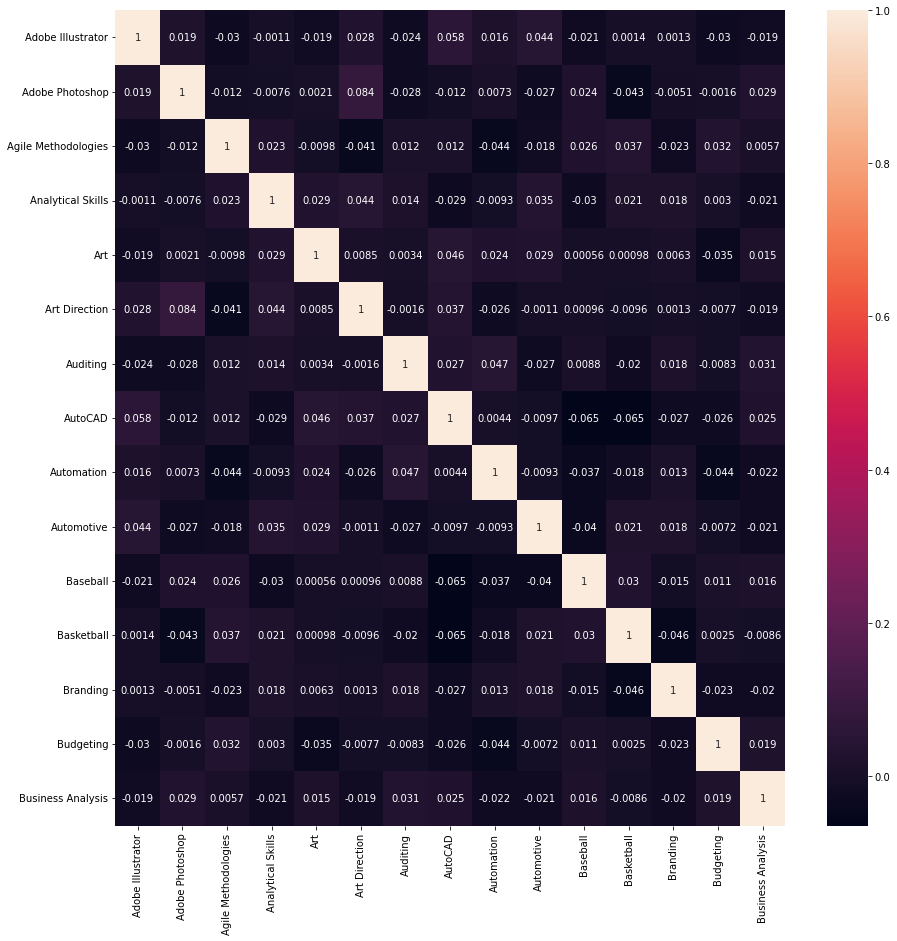

In [8]:
X_trainD = X_train.iloc[:,:15]
plt.figure(figsize=(15,15))
cor = X_trainD.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9846625766871165

In [10]:
from sklearn.svm import SVC
svm_rbf = SVC(random_state=42, kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf.score(X_test, y_test)

0.9861963190184049

In [11]:
svm_lnr = SVC(random_state=42, kernel='linear')
svm_lnr.fit(X_train, y_train)
svm_lnr.score(X_test, y_test)

0.9662576687116564

In [12]:
svm_poly = SVC(random_state=42, kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
svm_poly.score(X_test, y_test)

0.9708588957055214

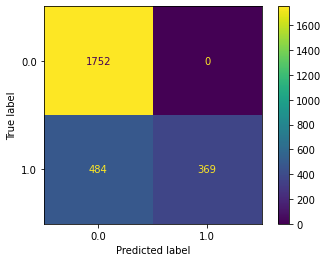

In [13]:
ConfusionMatrixDisplay.from_estimator(estimator=lr, X=X, y=y)

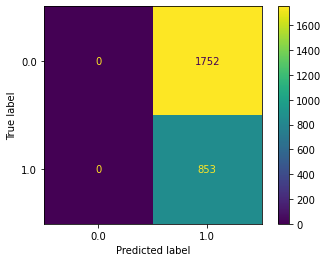

In [14]:
ConfusionMatrixDisplay.from_estimator(estimator=svm_rbf, X=X, y=y)

In [15]:
cross_val_score(lr, X, y, cv=5, scoring=None)

array([0.98080614, 0.97888676, 0.98464491, 0.98848369, 0.97696737])

In [16]:
cross_val_score(svm_rbf, X, y, cv=5, scoring=None)

array([0.9865643 , 0.98848369, 0.99040307, 0.99232246, 0.9865643 ])